In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
# /content/drive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [9]:
 !kaggle datasets download ifteshanajnin/carinsuranceclaimprediction-classification/code

carinsuranceclaimprediction-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip carinsuranceclaimprediction-classification.zip

Archive:  carinsuranceclaimprediction-classification.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/car_insurance_train.csv')

#About Dataset

The Dataset contains information on policyholders having the attributes like policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable indicating whether the policyholder files a claim in the next 6 months or not.


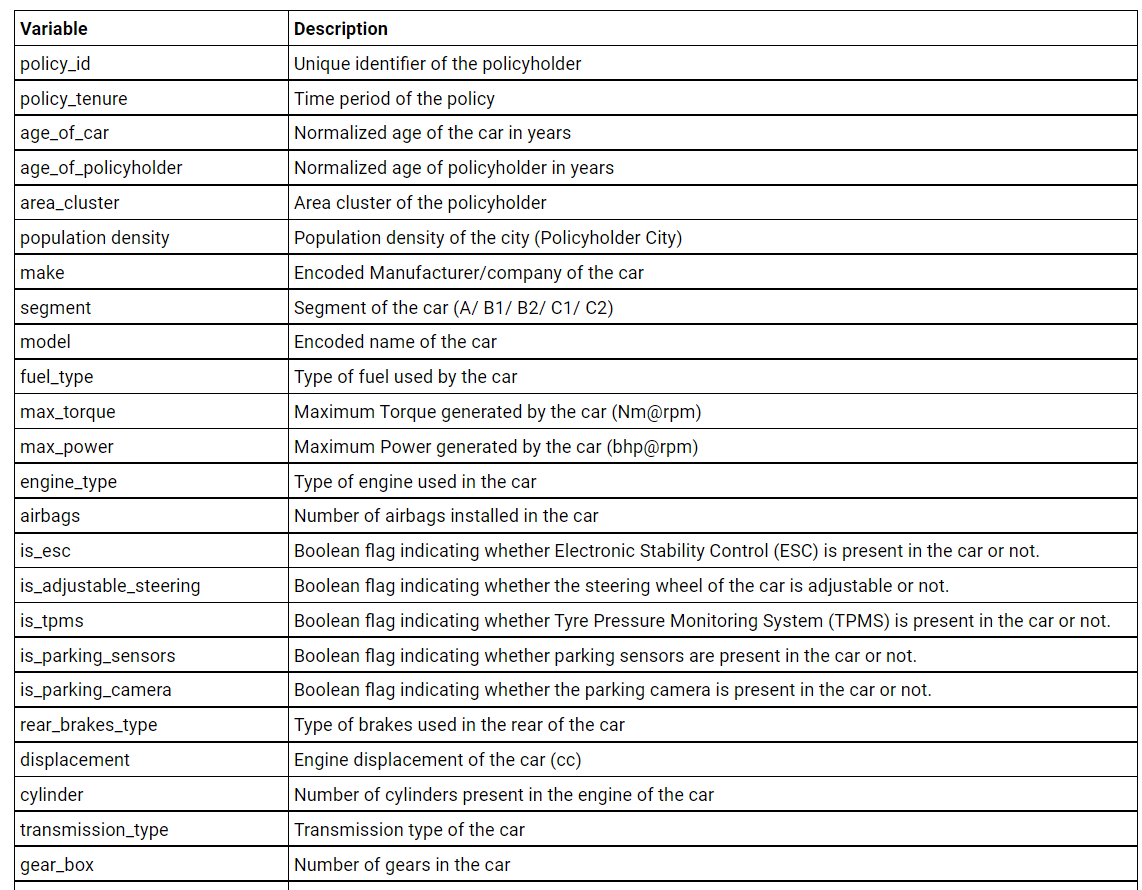

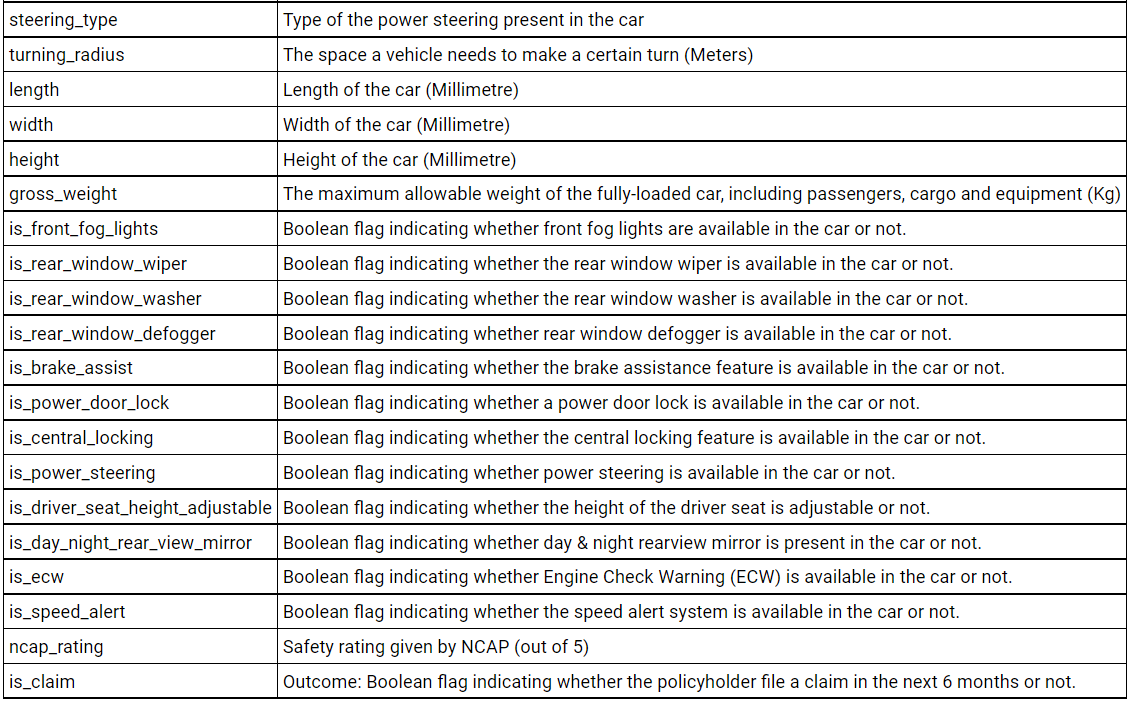

##Perfroming EDA

In [7]:
df.shape

(58592, 44)

In [8]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [9]:
df.set_index('policy_id',inplace=True)

In [10]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [11]:
len(df.columns)

43

There is a total of 42 features plus 1 target variable

In [12]:
numerical_features= df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(exclude=[np.number])

In [17]:
numerical_features.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [13]:
len(numerical_features.columns)

16

In [14]:
categorical_features.columns

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [15]:
len(categorical_features.columns)

27

In [18]:
df.nunique()

policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                                2
steering_type                     

In [19]:
df.isna().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

Pheww!! No missing values

In [20]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<20]

In [21]:
discrete_features

['make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

In [22]:
len(discrete_features)

12

In [23]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

In [24]:
continuous_features

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']

In [25]:
len(continuous_features)

4

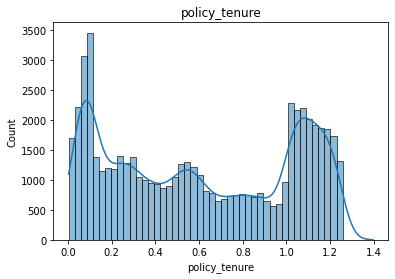

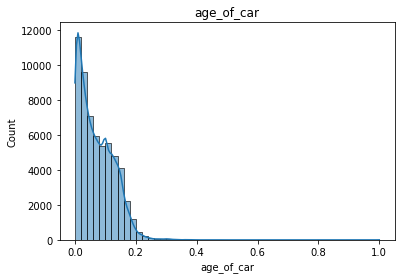

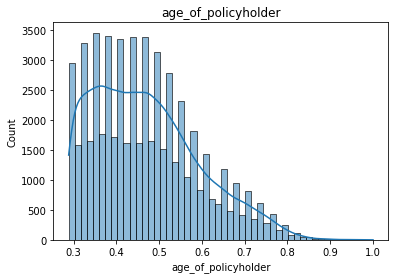

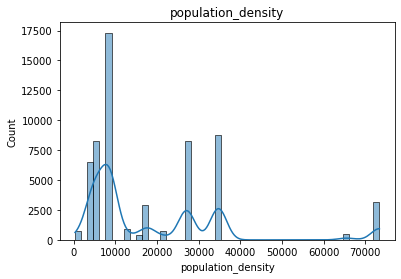

In [26]:
for feature in continuous_features:
    data=df.copy()
    sns.histplot(data[feature], bins=50, kde= True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

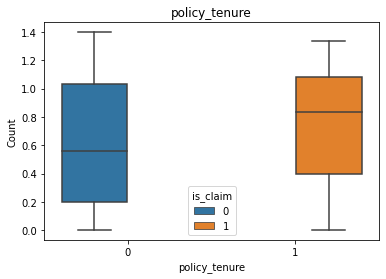

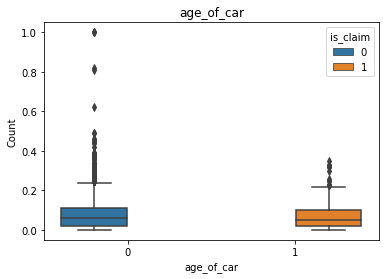

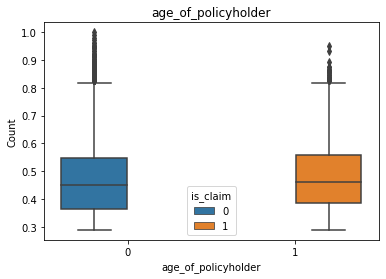

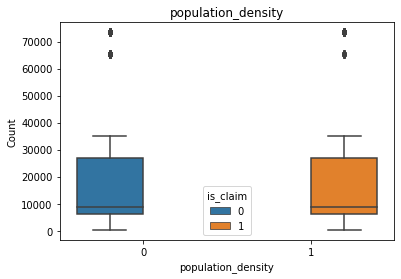

In [27]:
for feature in continuous_features:
    data=df.copy()
    sns.boxplot(data=data,y=feature,x=df['is_claim'], hue=df['is_claim'])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

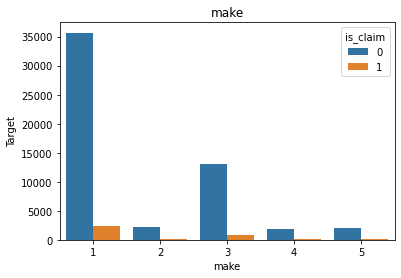

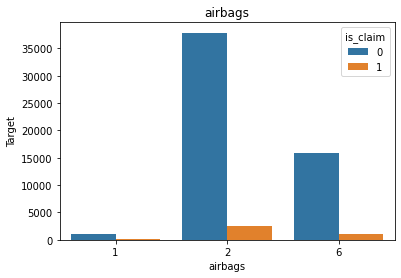

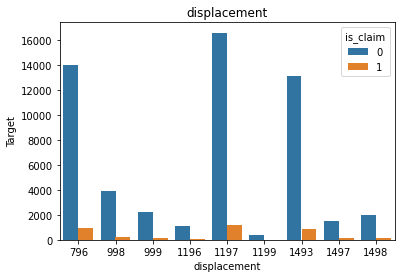

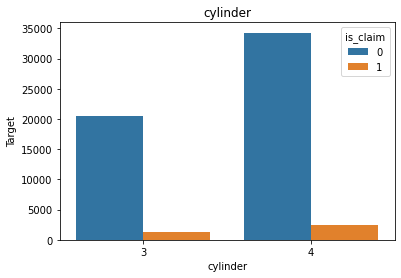

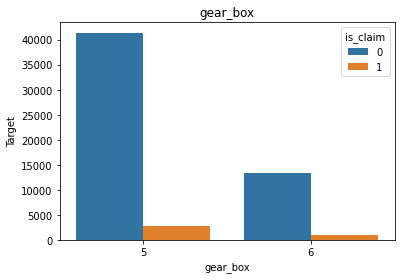

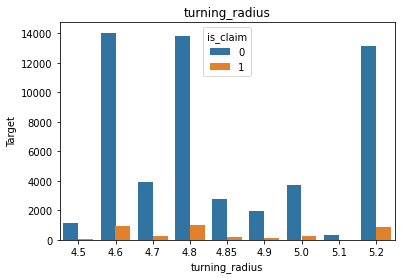

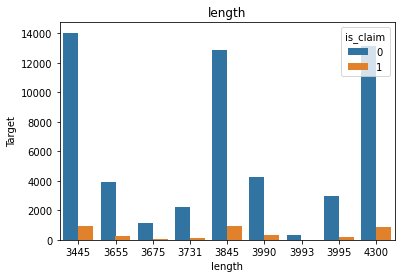

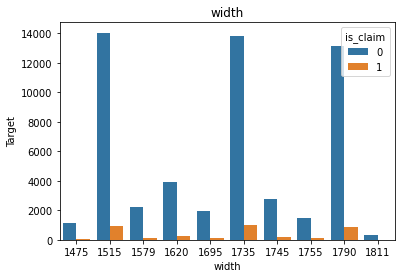

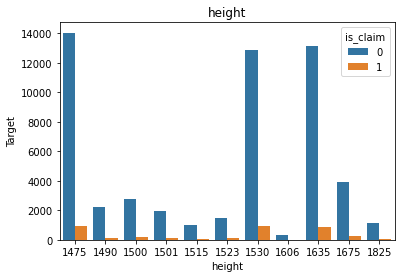

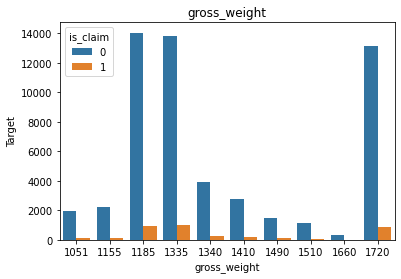

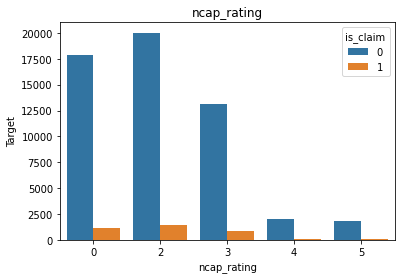

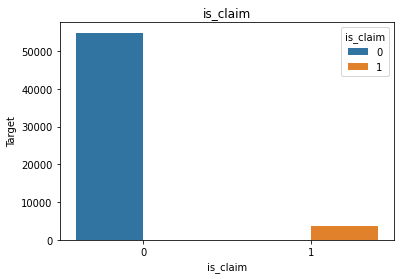

In [28]:
for feature in discrete_features:
    sns.countplot(x=df[feature], hue=df['is_claim'])
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(feature)
    plt.show()

In [29]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

As we can see, not only from value counts but also from each individual plots, the dataset is severely imbalanced. 

With such a high number of categorical features, which ultimately will be one-hot encoded, it will be difficult to deal with the high dimensional dataset. <br>

Ways to treat imbalanced dataset include-

1. Undersampling of majority class
2. Oversampling of minority class by simply duplicating examples from the minority class in the training dataset prior to fitting a model.
3. Oversampling by SMOTE technique by creating synthetic examples using KNN

I will use SMOTE and its types from imblearn library to make a balanced datasets. <br> But first lets have a look at the correlation between variables.

In [30]:
df.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.103981,0.194361,0.191185,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.173280,0.078747
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.209073,0.393208,0.379522,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.348853,-0.028172
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.008041,-0.023764,0.004183,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,-0.031628,0.022435
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.035125,-0.060359,-0.090983,-0.091591,-0.056640,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.071150,-0.017808
make,0.086101,0.188122,-0.031989,-0.035125,1.000000,0.501800,0.753344,0.410672,0.632807,0.753861,0.692365,0.511695,0.303274,0.481408,0.792254,-0.000456
airbags,0.103981,0.209073,-0.008041,-0.060359,0.501800,1.000000,0.661190,0.478594,0.859556,0.810820,0.809094,0.639562,0.423816,0.828988,0.341557,0.002789
displacement,0.194361,0.393208,-0.023764,-0.090983,0.753344,0.661190,1.000000,0.866231,0.692240,0.875407,0.961655,0.899302,0.554591,0.776210,0.847065,0.007678
cylinder,0.191185,0.379522,0.004183,-0.091591,0.410672,0.478594,0.866231,1.000000,0.410163,0.615806,0.805476,0.862430,0.352118,0.602978,0.598364,0.013434
gear_box,0.095305,0.201579,-0.003115,-0.056640,0.632807,0.859556,0.692240,0.410163,1.000000,0.861740,0.808975,0.601923,0.579725,0.894639,0.529688,-0.000635
turning_radius,0.166426,0.332716,-0.016764,-0.077501,0.753861,0.810820,0.875407,0.615806,0.861740,1.000000,0.944899,0.825603,0.460436,0.823097,0.779302,0.002724


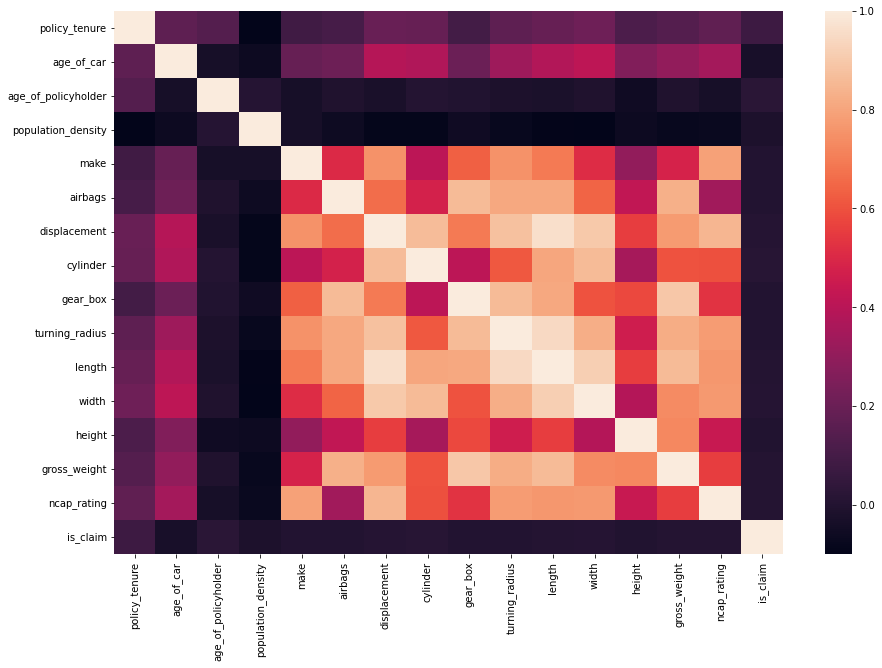

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

## Alert!! High degree of multicollinearity

What is the problem with multicollinearity? <br>
Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. 

When independent variables are linearly correlated, even though we might get a high value of R^2 ,i.e our model might be able to explain variance of our target variable to a good degree, we might find that individually the independent variables are statistically insignificant. Since the features are highly correlated it is very difficult to disentangle the effects of independent variables.

In our case, since there is a high correlation between independent variables, which will have to be either combined together or dropped. <br>
Correlation Matrix and Scatterplots are bivariate methods to see if there is a relationship between one variable and another variable. Here we need to see how one variable can be explained in terms of linear combinations of other variables. This is what Variance Inflation Factor does. <br>
VIF calculates the R^2 value by running regression of one variable on all the other variables, which describes how well that variable is described by other variables. <br> So if we get a high value of R^2, i.e closer to 1, and therefore a high value of VIF (VIF=1/(1-R^2)), there is a high degree of multicollinearity associated with that particular variable.

I will use Variance Inflation Factor with a threshold of 10 to remove or combine out multicollinear features.
What Variance Inflation Factor does is that it 

In [33]:
x= df.drop(['is_claim'],axis=1)

In [34]:
y= df['is_claim']

In [35]:
numerical_features= x.select_dtypes(include=[np.number])
categorical_features = x.select_dtypes(exclude=[np.number])

In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x[list(numerical_features.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
6,118746.174799,displacement
7,94275.158281,cylinder
11,67050.742344,width
10,44428.846539,length
12,29076.688991,height
9,12400.319247,turning_radius
8,4989.321067,gear_box
14,3217.624473,ncap_rating
5,2322.829114,airbags
13,2192.029533,gross_weight


In [37]:
x['dimensions'] = (x['width']*x['length']*x['height'])
numerical_features= x.select_dtypes(include=[np.number])
X = x[list(numerical_features.columns)].drop(['height','width','length'], axis=1)

X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,gross_weight,ncap_rating,dimensions
policy_id,,,,,,,,,,,,,
ID00001,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,1185,0,7698283125
ID00002,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,1185,0,7698283125
ID00003,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,1185,0,7698283125
ID00004,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,1335,2,10500957375
ID00005,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,1155,2,8777961010


In [38]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
12,5841.913684,dimensions
6,440.029467,displacement
4,59.856588,make
7,49.280218,cylinder
8,27.470442,gear_box
10,17.696638,gross_weight
11,16.774833,ncap_rating
5,7.402223,airbags
9,3.343211,turning_radius
1,1.266543,age_of_car


In [39]:
X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,gross_weight,ncap_rating,dimensions
policy_id,,,,,,,,,,,,,
ID00001,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,1185,0,7698283125
ID00002,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,1185,0,7698283125
ID00003,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,1185,0,7698283125
ID00004,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,1335,2,10500957375
ID00005,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,1155,2,8777961010


Still the dimensions feature has a high VIF. Therefore I will try to remove it and see its effect on the rest of the variables.

In [40]:
X = X.drop(['dimensions'], axis=1)

In [41]:
X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,gross_weight,ncap_rating
policy_id,,,,,,,,,,,,
ID00001,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,1185,0
ID00002,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,1185,0
ID00003,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,1185,0
ID00004,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,1335,2
ID00005,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,1155,2


In [42]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
8,2437.081909,gear_box
6,2352.422401,displacement
9,1514.663647,turning_radius
7,1513.012852,cylinder
10,766.994712,gross_weight
4,42.830949,make
11,40.084093,ncap_rating
5,26.629979,airbags
2,16.157367,age_of_policyholder
0,3.486617,policy_tenure


Lets drop gear_box as well

In [43]:
X = X.drop(['gear_box'], axis=1)

In [44]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
6,2226.913936,displacement
7,1507.174999,cylinder
8,351.406352,turning_radius
9,313.529072,gross_weight
10,39.509468,ncap_rating
4,31.851024,make
5,26.348902,airbags
2,16.153013,age_of_policyholder
0,3.486402,policy_tenure
1,3.146460,age_of_car


Lets drop displacement as well, since we do not get a significant reduction in VIF

In [45]:
X = X.drop(['displacement'], axis=1)

In [46]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
7,255.669566,turning_radius
8,239.021321,gross_weight
6,114.296486,cylinder
2,16.037737,age_of_policyholder
5,15.679192,airbags
4,15.231070,make
9,12.280621,ncap_rating
0,3.472862,policy_tenure
1,3.106426,age_of_car
3,2.174422,population_density


Lets drop turning_radius as well

In [47]:
X = X.drop(['turning_radius'], axis=1)

In [48]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
7,110.454977,gross_weight
6,83.027901,cylinder
2,15.253137,age_of_policyholder
4,11.489877,make
5,10.131079,airbags
8,8.865138,ncap_rating
0,3.465399,policy_tenure
1,3.105936,age_of_car
3,2.154025,population_density


Lets drop gross_weight as well

In [49]:
X = X.drop(['gross_weight'], axis=1)

In [50]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
6,25.427722,cylinder
2,14.115042,age_of_policyholder
4,11.377091,make
7,8.747893,ncap_rating
5,6.179631,airbags
0,3.465308,policy_tenure
1,3.101528,age_of_car
3,2.128457,population_density


Lets drop cylinder feature as well

In [51]:
X = X.drop(['cylinder'], axis=1)

In [52]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
4,11.371444,make
6,8.260853,ncap_rating
2,6.041811,age_of_policyholder
5,5.340896,airbags
0,3.382601,policy_tenure
1,2.938687,age_of_car
3,2.023744,population_density


The VIF values are in the range of our threshold. Lets keep these features for now.

In [54]:
X.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'ncap_rating'],
      dtype='object')

In [55]:
numerical_features.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'dimensions'],
      dtype='object')

In [56]:
X = x.drop(['displacement','cylinder','gear_box','turning_radius','length','width','height','gross_weight','dimensions'],axis = 1)

In [57]:
numerical_features= X.select_dtypes(include=[np.number])
categorical_features = X.select_dtypes(exclude=[np.number])

In [58]:
discrete_features = [feature for feature in numerical_features if len(X[feature].unique())<20]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from imblearn.pipeline import Pipeline as pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify= y ,test_size=0.2)

In [61]:
X.shape

(58592, 34)

In [62]:
X_train.shape

(46873, 34)

In [63]:
continuous_numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
        ("function_transform", PowerTransformer(method='yeo-johnson')),
    ]
)

In [64]:
discrete_numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", MinMaxScaler()),
    ]
)

In [65]:
categorical_preprocessor = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore", drop='first')), ##avoiding dummy variable trap
        ("imputation_most_frequent", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
    ]
)

In [66]:
preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, categorical_features.columns),
        ("numerical_discrete", discrete_numeric_preprocessor, discrete_features),
        ("numerical_continuous", continuous_numeric_preprocessor, continuous_features),
    ]
)

In [68]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [69]:
# Linear model (logistic regression)
lr = LogisticRegression(warm_start=True, max_iter=400)
# RandomForest
rf = RandomForestClassifier(max_depth=10,n_estimators=300)
# XGB
xgb = XGBClassifier(n_estimators=300,max_depth= 10,tree_method="hist", verbosity=0, silent=True)
# Ensemble
lr_xgb_rf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)], 
                             voting='soft')

In [70]:
pipe = pipeline_imb(
    steps=[
        ("preprocessor", preprocessor),
        ('smote', SMOTE()),
        ('ensemble', lr_xgb_rf),
    ]
)

In [71]:
from sklearn import set_config
set_config(display="diagram")

In [72]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')),
                                                                  ('imputation_most_frequent',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steeri...
                                                   'age_of_car',
                                                   'age_of_policyholder',
                                                   'population_density'])])),
                ('smote', SMOTE()),
                ('ensemble',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(max_iter=400,
                                                                  warm_start=True)),
                                              ('xgb',
                                               XGBClassifier(max_depth=10,
                                                             n_estimators=300,
                                                             silent=True,
                                                             tree_method='hist',
                                                             verbosity=0)),
                                              ('rf',
                                               RandomForestClassifier(max_depth=10,
                                                                      n_estimators=300))],
                                  voting='soft'))])

In [73]:
pipe.n_features_in_

34

In [74]:
y_pred = pipe.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10969
           1       0.13      0.10      0.11       750

    accuracy                           0.90     11719
   macro avg       0.53      0.53      0.53     11719
weighted avg       0.89      0.90      0.89     11719



Solutions posted on kaggle for this particular dataset are claiming a victory when the f1 score for target variable '0'(i.e. insurance claim is not filed in the next 6 months) is 95%, however they are ignoring 11% score of the target variable '1'(i.e. insurance claim is filed in the next 6 months).

It is quite clear that this is not a victory, 11% accuracy for the target variable, which is actually the target variable of significance in our problem set, is bad.

This is happening because of the severe imbalance in our dataset.

In [80]:
params = {
    #'ensemble__lr__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    #'ensemble__lr__penalty': ['none', 'l1', 'l2', 'elasticnet'],
    #'ensemble__lr__C': loguniform(1e-5, 100),
    #'ensemble__xgb__learning_rate': [0.1],
    #'ensemble__xgb__max_depth': [7, 10, 15, 20],
    #'ensemble__xgb__min_child_weight': [10, 15, 20, 25],
    #'ensemble__xgb__colsample_bytree': [0.8, 0.9, 1],
    #'ensemble__xgb__n_estimators': [300, 400, 500, 600],
    #'ensemble__xgb__reg_alpha': [0.5, 0.2, 1],
    #'ensemble__xgb__reg_lambda': [2, 3, 5],
    #'ensemble__xgb__gamma': [1, 2, 3],
    #'ensemble__rf__max_depth': [7, 10, 15, 20],
    #'ensemble__rf__min_samples_leaf': [1, 2, 4],
    #'ensemble__rf__min_samples_split': [2, 5, 10],
    'ensemble__rf__n_estimators': [300, 400, 500, 600],
}

##Running all the parameters will take a lot of time, 
## therefore I have reduced the hyperparameter search to only but a few hyperparameters.

In [81]:
from sklearn.model_selection import  RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold, cross_val_score

In [83]:
#rsf = RepeatedStratifiedKFold(random_state=42)
clf = GridSearchCV(pipe, params,scoring='accuracy', verbose=2) ## can add cv = rsf as well, however it was taking a long time
clf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................ensemble__rf__n_estimators=300; total time= 1.4min
[CV] END .....................ensemble__rf__n_estimators=300; total time= 1.4min
[CV] END .....................ensemble__rf__n_estimators=300; total time= 1.4min
[CV] END .....................ensemble__rf__n_estimators=300; total time= 1.5min
[CV] END .....................ensemble__rf__n_estimators=300; total time= 1.2min
[CV] END .....................ensemble__rf__n_estimators=400; total time= 1.2min
[CV] END .....................ensemble__rf__n_estimators=400; total time= 1.2min
[CV] END .....................ensemble__rf__n_estimators=400; total time= 1.3min
[CV] END .....................ensemble__rf__n_estimators=400; total time= 1.3min
[CV] END .....................ensemble__rf__n_estimators=400; total time= 1.3min
[CV] END .....................ensemble__rf__n_estimators=500; total time= 1.5min
[CV] END .....................ensemble__rf__n_est

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore')),
                                                                                         ('imputation_most_frequent',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc...
                                        VotingClassifier(estimators=[('lr',
                                                                      LogisticRegression(max_iter=400,
                                                                                         warm_start=True)),
                                                                     ('xgb',
                                                                      XGBClassifier(max_depth=10,
                                                                                    n_estimators=300,
                                                                                    silent=True,
                                                                                    tree_method='hist',
                                                                                    verbosity=0)),
                                                                     ('rf',
                                                                      RandomForestClassifier(max_depth=10,
                                                                                             n_estimators=300))],
                                                         voting='soft'))]),
             param_grid={'ensemble__rf__n_estimators': [300, 400, 500, 600]},
             scoring='accuracy', verbose=2)

In [84]:
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.9035691458644477
Best Params:  {'ensemble__rf__n_estimators': 600}


In [85]:
y_pred = clf.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10969
           1       0.14      0.10      0.11       750

    accuracy                           0.90     11719
   macro avg       0.54      0.53      0.53     11719
weighted avg       0.89      0.90      0.90     11719



No improvement in the accuracy of target variable '1'.

In [87]:
x_train_ct= preprocessor.fit_transform(X_train,y_train)

x_test_ct = preprocessor.transform(X_test)

x_train_ct.shape

(46873, 92)

###Lets try SMOTE relatives for sythetic data creation

In [88]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy=0.5)
#under = RandomUnderSampler(sampling_strategy='majority')

#steps = [('o', over), ('u', under)]
#pipeline = pipeline_imb(steps=steps)

x_train_smote, y_train_smote = over.fit_resample(x_train_ct,y_train)

#y_train_smote.value_counts()

vclf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)], 
                             voting='soft')

vclf.fit(x_train_smote,y_train_smote)

y_pred = vclf.predict(x_test_ct)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10969
           1       0.12      0.02      0.03       750

    accuracy                           0.93     11719
   macro avg       0.53      0.51      0.50     11719
weighted avg       0.88      0.93      0.90     11719



In [89]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy='majority')

#steps = [('o', over), ('u', under)]
#pipeline = pipeline_imb(steps=steps)

x_train_smote, y_train_smote = under.fit_resample(x_train_ct,y_train)

#y_train_smote.value_counts()

vclf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)], 
                             voting='soft')

vclf.fit(x_train_smote,y_train_smote)

y_pred = vclf.predict(x_test_ct)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.56      0.70     10969
           1       0.09      0.63      0.16       750

    accuracy                           0.56     11719
   macro avg       0.52      0.59      0.43     11719
weighted avg       0.90      0.56      0.67     11719



The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.

We can update the example to first oversample the minority class to have 50 percent the number of examples of the majority class (e.g. about 5,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 10,000).

In [91]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = pipeline_imb(steps=steps)

x_train_smote, y_train_smote = pipeline.fit_resample(x_train_ct,y_train)

#y_train_smote.value_counts()

vclf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)], 
                             voting='soft')

vclf.fit(x_train_smote,y_train_smote)

y_pred = vclf.predict(x_test_ct)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.08      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.51      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719



In [93]:
y_train_smote.value_counts()

0    43874
1    21937
Name: is_claim, dtype: int64

There is still no improvement.

Lets try ADASYN technique

In [94]:
from imblearn.over_sampling import ADASYN
#from imblearn.under_sampling import RandomUnderSampler

over2 = ADASYN(sampling_strategy=0.5)
#under = RandomUnderSampler(sampling_strategy=0.5)

#steps = [('o', over), ('u', under)]
#pipeline = pipeline_imb(steps=steps)

x_train_smote, y_train_smote = over2.fit_resample(x_train_ct,y_train)

#y_train_smote.value_counts()

vclf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)], 
                             voting='soft')

vclf.fit(x_train_smote,y_train_smote)

y_pred = vclf.predict(x_test_ct)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.33      0.00      0.01       750

    accuracy                           0.94     11719
   macro avg       0.63      0.50      0.49     11719
weighted avg       0.90      0.94      0.91     11719



Lets try SMOTETomek

In [95]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

over3 = SMOTETomek()
#under = RandomUnderSampler(sampling_strategy=0.5)

#steps = [('o', over), ('u', under)]
#pipeline = pipeline_imb(steps=steps)

x_train_smote, y_train_smote = over3.fit_resample(x_train_ct,y_train)

#y_train_smote.value_counts()

vclf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)], 
                             voting='soft')

vclf.fit(x_train_smote,y_train_smote)

y_pred = vclf.predict(x_test_ct)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10969
           1       0.13      0.10      0.11       750

    accuracy                           0.90     11719
   macro avg       0.53      0.53      0.53     11719
weighted avg       0.89      0.90      0.89     11719



#Conclusion

Domain expertise will be required for feature engineering and feature selection, only then can we work with SMOTE in this severely imbalanced dataset. This is because SMOTE works on K-nearest neighbours to manufacture synthetic data. Since KNN has a hard time operating in a high dimensional space, SMOTE will not work unless we reduce the feature space by a large degree. Until this is done, it is not quite possible to work with such a dataset.